# Import Library and Read Datasets

In [52]:
#Library for data manipulation
import pandas as pd
import numpy as np

#Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Library for regression and clustering model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read Datasets
cust = pd.read_csv('https://raw.githubusercontent.com/meikotrip/ds-kalbe-nutritionals/main/dataset/Case%20Study%20-%20Customer.csv',sep=';')
trx = pd.read_csv('https://raw.githubusercontent.com/meikotrip/ds-kalbe-nutritionals/main/dataset/Case%20Study%20-%20Transaction.csv',sep=';')
product = pd.read_csv('https://raw.githubusercontent.com/meikotrip/ds-kalbe-nutritionals/main/dataset/Case%20Study%20-%20Product.csv',sep=';')
store = pd.read_csv('https://raw.githubusercontent.com/meikotrip/ds-kalbe-nutritionals/main/dataset/Case%20Study%20-%20Store.csv',sep=';')

# Data Cleaning

## Product

In [3]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [5]:
product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

## Transaction

In [6]:
trx.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [7]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [8]:
trx.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [9]:
# Mengubah tipe data date
trx['Date'] = pd.to_datetime(trx['Date'])
trx.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


## Customer

In [10]:
cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [11]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [12]:
# Mengubah tipe data income
cust['Income'] = cust['Income'].str.replace(',','.').astype('float64')

In [13]:
cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [14]:
cust['Marital Status'].fillna(cust['Marital Status'].mode()[0], inplace=True) #Mengisi semua nilai NaN menjadi nilai modus

cust['Marital Status'] = cust['Marital Status'].replace({'Single' : 0, 'Married' : 1})

cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [15]:
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    int64  
 4   Income          447 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 17.6 KB


,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,1,5.12
1,2,60,1,1,6.23
2,3,32,1,1,9.17
3,4,31,1,1,4.87
4,5,58,1,1,3.57


## Store

In [16]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [18]:
# Drop Data yang kurang relevan
store = store.drop(columns = ['Latitude', 'Longitude'])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
dtypes: int64(1), object(3)
memory usage: 580.0+ bytes


In [19]:
store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
dtype: int64

# Data Merge

In [20]:
# Melakukan merging semua data menjadi satu
df = pd.merge(trx, cust, on='CustomerID')
df = pd.merge(df, product, on='ProductID', suffixes=('_cust','_product'))
df = pd.merge(df, store, on='StoreID')

df.head()

,TransactionID,CustomerID,Date,ProductID,Price_cust,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_product,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,1,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,0,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,1,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,0,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,1,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_cust      5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   int64         
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  Price_product   5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [22]:
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_cust        0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_product     0
StoreName         0
GroupStore        0
Type              0
dtype: int64

# Machine Learning Regression (Time Series)

## Data Preparation

In [23]:
# Membuat data baru untuk regression
df_fc = df[['Date','Qty']]
df_fc = df_fc.groupby('Date')[['Qty']].sum()
df_fc.shape # Terdapat 365 Data

(365, 1)

In [24]:
df_fc.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


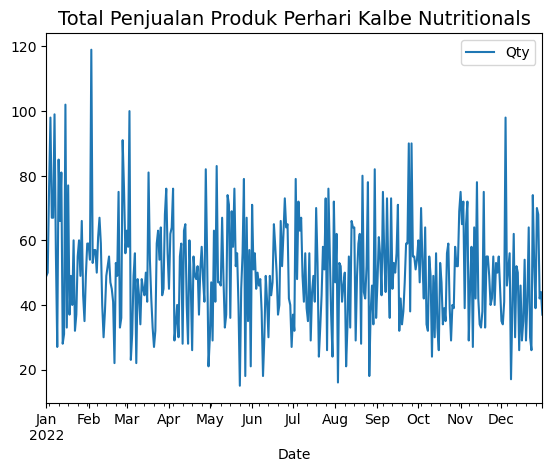

In [25]:
df_fc.plot()
plt.title('Total Penjualan Produk Perhari Kalbe Nutritionals', fontsize=14)
plt.show()

## Stationarity Check

In [26]:
# ADF Test
adf_test = adfuller(df_fc)
print(f'p-value : {adf_test[1]}')
if adf_test[1] <= 0.05:
    print('data dianggap statisioner karena p-value kurang dari nilai signifikansi sebesar 5%')
else:
    print('data dianggap tidak statisioner')

p-value : 0.0
data dianggap statisioner karena p-value kurang dari nilai signifikansi sebesar 5%


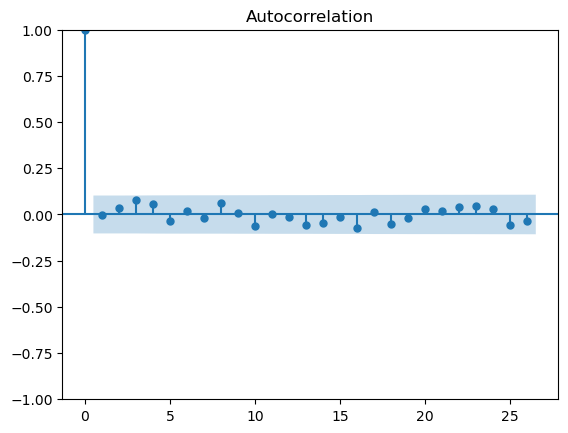

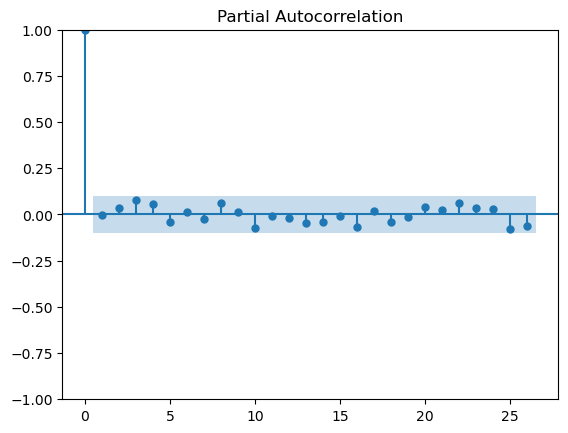

In [27]:
# ACF dan PACF 
p_acf = plot_acf(df_fc)
p_pcf = plot_pacf(df_fc)

# plot ACF dan PACF juga telah membuktikan bahwa data menunjukkan hasil yang statisioner

In [28]:
# Mengubah data ke log
df_fc = np.log(df_fc)
df_fc.head()

,Qty
Date,
2022-01-01,3.891820
2022-01-02,3.912023
2022-01-03,4.330733
2022-01-04,4.584967
2022-01-05,4.204693


In [29]:
# Membagi data menjadi train dan test

df_train = df_fc.iloc[:-31]
df_test = df_fc.iloc[-31:]

## ARIMA Model Building

In [30]:
# Metode Auto ARIMA
auto_arima = pm.auto_arima(df_train, trace=True, stepwise=False, seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1855.801, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1482.458, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1206.481, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1065.183, Time=0.08 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=941.289, Time=0.14 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=859.710, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=259.233, Time=0.27 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=258.632, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Ti

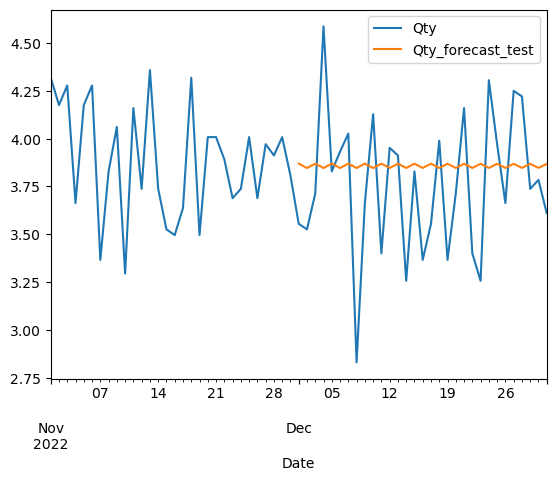

In [31]:
# Melakukan forecasting/predict data test 
# berdasarkan model ARIMA yang didapatkan

model_forecast = auto_arima.predict(len(df_test)) # Prediksi data test (1 bulan terakhir)
df_plot = df_fc[['Qty']].iloc[-61:] # Plot Qty 2 Bulan terakhir

df_plot['Qty_forecast_test'] = [None]*(len(df_plot)-len(model_forecast)) + list(model_forecast)
df_plot.plot()
plt.show()

In [32]:
# Evaluasi model forecast
rmse = np.sqrt(mean_squared_error(df_test, model_forecast))
print(f'RMSE : {round(rmse,4)}')

RMSE : 0.3779


In [33]:
# Mengubah kembali data log
df_fc = np.exp(df_fc)

In [34]:
# Melakukan forecast data untuk 1 bulan kedepan
model = ARIMA(df_fc, order=(2,0,2))
model_fit = model.fit()
model_forecast = model_fit.forecast(steps=31)

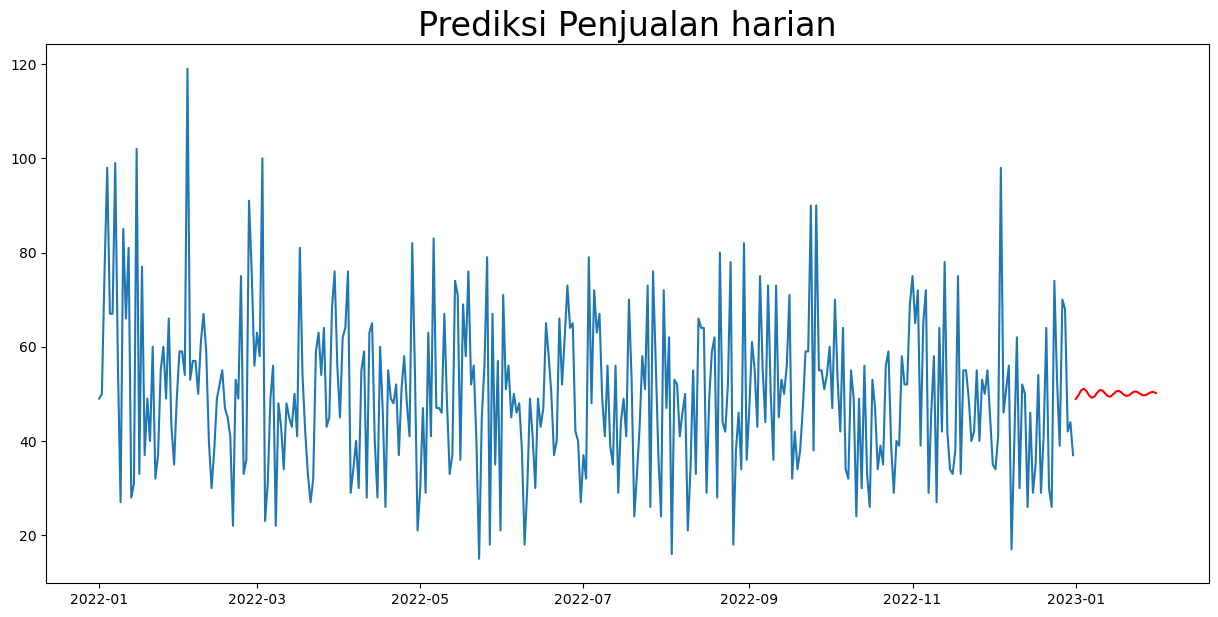

In [35]:
# Plot forecasting
plt.figure(figsize=(15,7))
plt.plot(df_fc)
plt.plot(model_forecast, color='red')
plt.title('Prediksi Penjualan harian', fontsize=24)
plt.show()

In [48]:
# Nilai prediksi yang didapatkan

no = 1
for predict_value in model_forecast.values:
    print(f'Prediksi hari ke-{no} : {round(predict_value)}')
    no = no + 1

Prediksi hari ke-1 : 49
Prediksi hari ke-2 : 50
Prediksi hari ke-3 : 51
Prediksi hari ke-4 : 51
Prediksi hari ke-5 : 51
Prediksi hari ke-6 : 50
Prediksi hari ke-7 : 49
Prediksi hari ke-8 : 49
Prediksi hari ke-9 : 50
Prediksi hari ke-10 : 51
Prediksi hari ke-11 : 51
Prediksi hari ke-12 : 50
Prediksi hari ke-13 : 49
Prediksi hari ke-14 : 49
Prediksi hari ke-15 : 50
Prediksi hari ke-16 : 50
Prediksi hari ke-17 : 51
Prediksi hari ke-18 : 50
Prediksi hari ke-19 : 50
Prediksi hari ke-20 : 50
Prediksi hari ke-21 : 50
Prediksi hari ke-22 : 50
Prediksi hari ke-23 : 51
Prediksi hari ke-24 : 50
Prediksi hari ke-25 : 50
Prediksi hari ke-26 : 50
Prediksi hari ke-27 : 50
Prediksi hari ke-28 : 50
Prediksi hari ke-29 : 50
Prediksi hari ke-30 : 50
Prediksi hari ke-31 : 50


## Evaluation Model

In [46]:
rmse = np.sqrt(mean_squared_error(df_test, model_forecast))
print(f'RMSE : {rmse}')

RMSE : 46.30993921931897


# Machine Learning Clustering

## Data Preparation

In [49]:
# Membuat data baru untuk clustering
df_cl = df[['CustomerID','TransactionID','Qty','TotalAmount']]
df_cl = df_cl.groupby('CustomerID')[['TransactionID','Qty','TotalAmount']].agg({'TransactionID':'count', 'Qty':'sum', 'TotalAmount':'sum'})
df_cl.shape

(447, 3)

In [50]:
df_cl.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


## KMeans Clusteing Model

In [54]:
# Membuat dataframe dengan data yang telah di standarisasi
scaled_data = StandardScaler().fit_transform(df_cl.values)
df_clstd = pd.DataFrame(data=scaled_data, columns=df_cl.columns)
df_clstd.head()

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


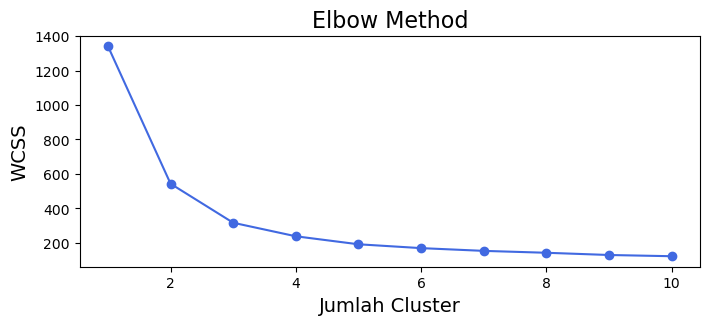

In [59]:
# Elbow Method
wcss = []

for i in range(1,11) :
    model1 = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    model1.fit(df_clstd)
    wcss.append(model1.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Jumlah Cluster', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()  # Didapatkan n_cluster = 3

In [60]:
# CLustering Model dengan n_cluster = 3
model1=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(df_clstd)
labels1=model1.labels_
centroids1=model1.cluster_centers_

In [63]:
# Menambahkan label cluster pada dataframe awal
df_cl['Cluster'] = labels1
df_cl.head()

,TransactionID,Qty,TotalAmount,Cluster
CustomerID,,,,
1,17,60,623300,1
2,13,57,392300,1
3,15,56,446200,1
4,10,46,302500,0
5,7,27,268600,2


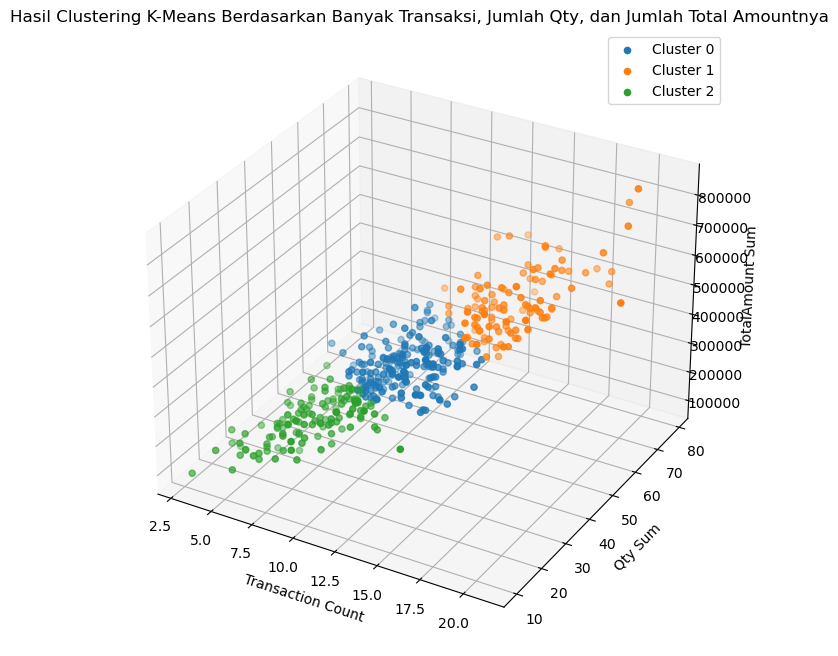

In [68]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data untuk setiap cluster
for cluster_num in range(3):
    cluster_data = df_cl[df_cl['Cluster'] == cluster_num]
    ax.scatter(cluster_data['TransactionID'], cluster_data['Qty'], cluster_data['TotalAmount'], label=f'Cluster {cluster_num}')
    
ax.set_xlabel('Transaction Count')
ax.set_ylabel('Qty Sum')
ax.set_zlabel('TotalAmount Sum')
ax.set_title('Hasil Clustering K-Means Berdasarkan Banyak Transaksi, Jumlah Qty, dan Jumlah Total Amountnya')
ax.legend()

plt.show()